# we should normolize the data after spliting to not have data leakadge if you have any other remarque write it here

# we should also change the name of the target variable 

# We should deal with outliers (blox pot)

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)


### We import the necessary libraires

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./metropt+3+dataset/MetroPT3(AirCompressor).csv")

In [4]:
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


# DATA CLEANING PART 

In [5]:
df.shape

(1516948, 17)

In [6]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

**We drop the Unnamed: 0**

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

### We convert the timestamp feature into a time object

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [10]:
type(df['timestamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### We check if there is any nan values to Handle 

In [11]:
df.isna().sum()

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

**We see that there is no nan values to handle**

### We check if there is duplicates

In [12]:
df.duplicated().sum()

0

##### **as we see all the values are false so there is no duplicate value**

# Label data part

**As mentioned in the report we can label our data as Failure or not**

In [13]:
# Initially, all data is labeled as "up" (1)
df['down'] = 1  

# Define the periods when the machine was down from the report
down_periods = [
    ('2020-04-18 00:00:00', '2020-04-18 23:59:00'),
    ('2020-05-29 23:30:00', '2020-05-30 06:00:00'),
    ('2020-06-05 10:00:00', '2020-06-07 14:30:00'),
    ('2020-07-15 14:30:00', '2020-07-15 19:00:00')
]

# Label the corresponding rows as "down" within the specified periods
for start, end in down_periods:
    df.loc[(df['timestamp'] >= start) & (df['timestamp'] <= end), 'down'] = 0



In [14]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,down
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [15]:
# Count the occurrences of each value in the 'down_label' column
print(df['down'].value_counts())
# Count theoccurrences of each value in the 'down_label' column
df['down'].value_counts(normalize=True)

down
1    1486994
0      29954
Name: count, dtype: int64


down
1    0.980254
0    0.019746
Name: proportion, dtype: float64

**we remarque that we have unbalnceded data set**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   timestamp        1516948 non-null  datetime64[ns]
 1   TP2              1516948 non-null  float64       
 2   TP3              1516948 non-null  float64       
 3   H1               1516948 non-null  float64       
 4   DV_pressure      1516948 non-null  float64       
 5   Reservoirs       1516948 non-null  float64       
 6   Oil_temperature  1516948 non-null  float64       
 7   Motor_current    1516948 non-null  float64       
 8   COMP             1516948 non-null  float64       
 9   DV_eletric       1516948 non-null  float64       
 10  Towers           1516948 non-null  float64       
 11  MPG              1516948 non-null  float64       
 12  LPS              1516948 non-null  float64       
 13  Pressure_switch  1516948 non-null  float64       
 14  Oi

### We split the data into training and testing sets before preprocessing

* we are doing this to avoid DATA LEAKAGE *

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['down'] , axis=1)  
y = df['down']                 

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Data Exploratory Analysis

**We check the number of unique of unique values in each of the features**

In [18]:
unique_values_per_feature = X_train.nunique()

print(unique_values_per_feature)

timestamp          1213558
TP2                   5202
TP3                   3475
H1                    2465
DV_pressure           2114
Reservoirs            3472
Oil_temperature       2399
Motor_current         1707
COMP                     2
DV_eletric               2
Towers                   2
MPG                      2
LPS                      2
Pressure_switch          2
Oil_level                2
Caudal_impulses          2
dtype: int64


In [19]:
columns_of_interest = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

for column in columns_of_interest:
    unique_values = X_train[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'COMP': [0. 1.]
Unique values in 'DV_eletric': [1. 0.]
Unique values in 'Towers': [0. 1.]
Unique values in 'MPG': [0. 1.]
Unique values in 'LPS': [0. 1.]
Unique values in 'Pressure_switch': [1. 0.]
Unique values in 'Oil_level': [1. 0.]
Unique values in 'Caudal_impulses': [0. 1.]


In [20]:
# List of columns to convert to binary
binary_columns = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

# Convert columns to binary
for column in binary_columns:
    df[column] = df[column].astype(int)

In [21]:
X_train.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
291873,2020-03-11 07:23:41,9.968,9.576,-0.012,-0.026,9.570,66.450,6.0425,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
31228,2020-02-04 22:57:21,-0.014,8.130,8.120,-0.020,8.134,55.700,0.0350,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1150046,2020-07-12 06:49:19,-0.014,8.632,8.620,-0.020,8.634,63.575,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1081908,2020-07-01 23:34:44,-0.012,9.042,9.028,-0.020,9.042,63.775,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
495364,2020-04-08 07:05:53,-0.012,9.352,9.340,-0.024,9.350,63.700,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [22]:
# # List of columns to analyze
# columns_of_interest = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'down']

# for column in columns_of_interest:
#     counts = df[column].value_counts()
#     total_entries = counts.sum()
#     print(f"Counts and Proportions for '{column}':")
#     for index, count in counts.items():
#         proportion = count / total_entries
#         print(f"{index}: {count} ({proportion:.2%})")
#     print()


In [23]:
#df = df.drop(['timestamp'], axis=1)

# Data is biased

In [24]:
# # Weekends vs. Weekdays
# X_train['is_weekend'] = X_train['timestamp'].dt.dayofweek // 5

# # Business Hours and Time of Day
# X_train['hour_of_day'] = X_train['timestamp'].dt.hour
# X_train['time_of_day'] = pd.cut(X_train['hour_of_day'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], include_lowest=True)

# # Seasons
# seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
# X_train['season'] = X_train['timestamp'].dt.month.map(seasons)

# # Week of Year Number
# X_train['week_of_year'] = X_train['timestamp'].dt.isocalendar().week

# # Month
# X_train['month'] = X_train['timestamp'].dt.month

# # Year
# X_train['year'] = X_train['timestamp'].dt.year

# # Beginning/End of Month (Pay Days)
# X_train['is_payday'] = X_train['timestamp'].dt.is_month_start | X_train['timestamp'].dt.is_month_end

# # Quarter
# X_train['quarter'] = X_train['timestamp'].dt.quarter

# # Drop the original timestamp column
# X_train.drop(columns=['timestamp'], inplace=True)

# # Print a sample of the DataFrame to verify the new features
# (X_train.head())





In [25]:
X_train = X_train.drop(['timestamp'], axis=1)

In [26]:
X_train.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
291873,9.968,9.576,-0.012,-0.026,9.570,66.450,6.0425,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
31228,-0.014,8.130,8.120,-0.020,8.134,55.700,0.0350,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1150046,-0.014,8.632,8.620,-0.020,8.634,63.575,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1081908,-0.012,9.042,9.028,-0.020,9.042,63.775,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
495364,-0.012,9.352,9.340,-0.024,9.350,63.700,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [27]:
# # Label Encoding
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# X_train['time_of_day_encoded'] = label_encoder.fit_transform(X_train['time_of_day'])
# X_train['season_encoded'] = label_encoder.fit_transform(X_train['season'])

# # One-Hot Encoding
# one_hot_encoded_X_train = pd.get_dummies(X_train, columns=['time_of_day', 'season'])

In [28]:
# X_train.drop(['time_of_day', 'season'], axis=1, inplace=True)

# drop year

In [29]:
# X_train.drop(['year'] , axis = 1 , inplace = True)

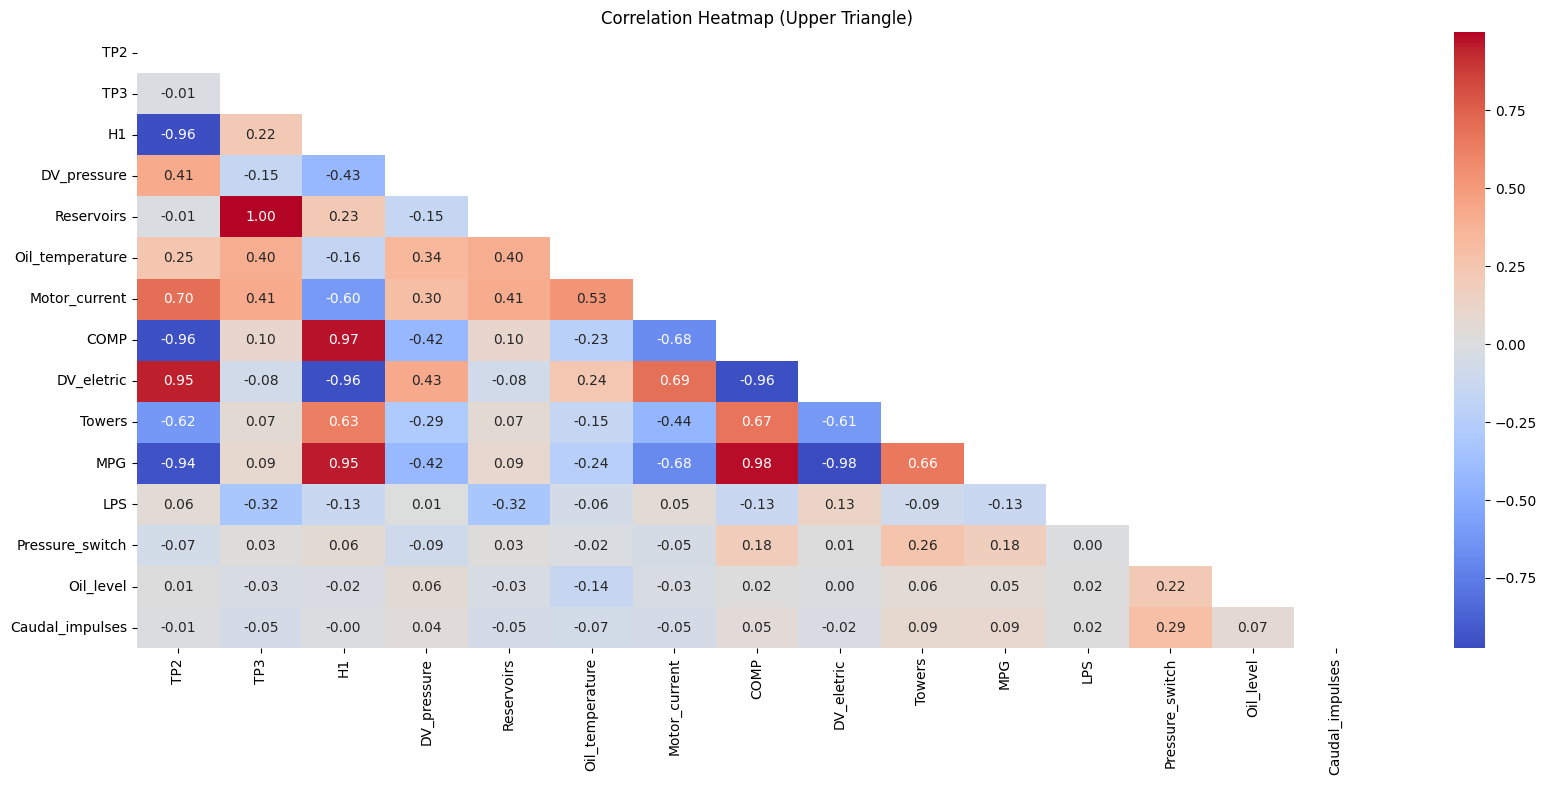

In [30]:
import numpy as np

# Compute the correlation matrix
correlation_matrix = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the heatmap with upper triangle masked
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Upper Triangle)')
plt.show()


In [31]:
X_train[['TP3', 'Reservoirs', 'COMP', 'H1', 'MPG']]

,TP3,Reservoirs,COMP,H1,MPG
291873,9.576,9.570,0.0,-0.012,0.0
31228,8.130,8.134,1.0,8.120,1.0
1150046,8.632,8.634,1.0,8.620,1.0
1081908,9.042,9.042,1.0,9.028,1.0
495364,9.352,9.350,1.0,9.340,1.0
...,...,...,...,...,...
1147342,9.090,9.092,1.0,9.076,1.0
1277425,10.138,10.136,1.0,10.138,1.0
630988,9.714,9.714,1.0,9.700,1.0
1040048,8.442,8.446,1.0,8.432,1.0


# Same preprocessing for the test data

In [32]:
# # Weekends vs. Weekdays
# X_test['is_weekend'] = X_test['timestamp'].dt.dayofweek // 5

# # Business Hours and Time of Day
# X_test['hour_of_day'] = X_test['timestamp'].dt.hour
# X_test['time_of_day'] = pd.cut(X_test['hour_of_day'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], include_lowest=True)

# # Seasons
# seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
# X_test['season'] = X_test['timestamp'].dt.month.map(seasons)

# # Week of Year Number
# X_test['week_of_year'] = X_test['timestamp'].dt.isocalendar().week

# # Month
# X_test['month'] = X_test['timestamp'].dt.month

# # Year
# X_test['year'] = X_test['timestamp'].dt.year

# # Beginning/End of Month (Pay Days)
# X_test['is_payday'] = X_test['timestamp'].dt.is_month_start | X_test['timestamp'].dt.is_month_end

# # Quarter
# X_test['quarter'] = X_test['timestamp'].dt.quarter



# # Print a sample of the DataFrame to verify the new features
# (X_test.head())


# X_test['time_of_day_encoded'] = label_encoder.fit_transform(X_test['time_of_day'])
# X_test['season_encoded'] = label_encoder.fit_transform(X_test['season'])

# # One-Hot Encoding
# one_hot_encoded_X_test = pd.get_dummies(X_test, columns=['time_of_day', 'season'])

# X_test.drop(['time_of_day', 'season'], axis=1, inplace=True)

# X_test.drop(['year'] , axis = 1 , inplace = True)




In [33]:
# Drop the original timestamp column
X_test.drop(columns=['timestamp'], inplace=True)

In [34]:
X_train.columns

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

In [35]:
X_train.shape

(1213558, 15)

In [36]:
y_train.shape

(1213558,)

# MODELLING

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

# Print the accuracy
print("Decision Tree Classifier Accuracy:", accuracy)
print("Decision Tree Classifier f score:", f1_score)


Decision Tree Classifier Accuracy: 0.9991496094136261
Decision Tree Classifier f score: 0.9995662509624857


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report = classification_report(y_test, y_pred)
print(classification_report)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5991
           1       1.00      1.00      1.00    297399

    accuracy                           1.00    303390
   macro avg       0.99      0.99      0.99    303390
weighted avg       1.00      1.00      1.00    303390


Confusion Matrix:
 [[  5854    137]
 [   121 297278]]


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9993968159794324

Confusion Matrix:
 [[  5920     71]
 [   112 297287]]


In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardizing the features (optional but recommended for Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = nb_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print("Naive Bayes Classifier Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))




Naive Bayes Classifier Accuracy: 0.9090642407462343
[[  5948     43]
 [ 27546 269853]]


In [48]:
y_test.sum() - y_test.shape


array([-5991])

In [50]:
# Initialize the KNN classifier
from sklearn.neighbors import KNeighborsClassifier


knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Print classification report


TypeError: 'str' object is not callable

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9986354197567487


In [ ]:
# Initialize the SVM classifier
from sklearn.svm import SVC


svm_classifier = SVC(kernel='linear', C=1E10)  # Linear kernel with high regularization

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Print classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

In [ ]:
# Import necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Initialize the ANN model
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test data
_, accuracy = ann_model.evaluate(X_test, y_test)
print(f"ANN Accuracy: {accuracy:.2f}")